<a href="https://colab.research.google.com/github/dalexa10/Python_Data_Science/blob/main/Statistical_Modeling/GLM/generalized_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistical modeling
##Generalized Linear Models

Import packages first

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt 
import math

###Example 1: Psych Data


The data represent the following:
\begin{align}
  Y_i = 
  \begin{cases}
    0 & if \ subject \ i \ is \ healthy \ (30) \\
    1 & if \ subject \ i \ is \ mentally \ ill \ (15) 
  \end{cases}
\end{align}

And the expanatory variables $x_1$, $x_2$, $x_3$, $x_4$, $x_5$ represent scores (1 to 4) on five questions, where higher values are expected to be healthier. 

Let's read the data ... You might need to change the `url_data` variable

In [4]:
url_data = 'https://raw.githubusercontent.com/dalexa10/Python_Data_Science/main/Statistical_Modeling/GLM/psych.txt'
psych = pd.read_csv(url_data, sep=' ')
psych.shape
psych.head(5)

,ill,x1,x2,x3,x4,x5
0,1,2,2,2,2,2
1,1,2,2,2,1,2
2,1,1,1,2,1,1
3,1,2,2,2,1,2
4,1,1,1,2,1,2


In [5]:
psych.tail(5)

,ill,x1,x2,x3,x4,x5
40,0,2,2,2,1,2
41,0,4,2,2,2,2
42,0,3,3,2,3,3
43,0,2,3,2,2,2
44,0,4,3,1,2,3


Note that the $ill$ column is binary. Hence, a proper linear model depending on the response variables $x_i$ 

Note that `Binomial()` method is used in the `sm.families` object for the `familly` argument

In [6]:
endog = psych.iloc[:,0] #y: ill
exog = sm.add_constant(psych.iloc[:,1:]) # x1-x5 with the interception

psychfit1 = sm.GLM(endog, exog, family=sm.families.Binomial())
result1 = psychfit1.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       39
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.827
Date:                Sat, 18 Feb 2023   Deviance:                       25.653
Time:                        18:33:49   Pearson chi2:                     39.8
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2226      6.332      2.404      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The previous results can be obtained by using the function `logit` from the API `statsmodels.formula.api`

In [7]:
# In another way
logistic_model = logit('ill ~ x1+x2+x3+x4+x5',psych)
result = logistic_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.285038
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    ill   No. Observations:                   45
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            5
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.5522
Time:                        18:33:52   Log-Likelihood:                -12.827
converged:                       True   LL-Null:                       -28.643
Covariance Type:            nonrobust   LLR p-value:                 7.023e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2226      6.332      2.404      0.016       2.812      27.633
x1            -0.6757      0.

Bsically the same results are obtained. It can be seen that all effects ( $\hat{\beta}_i$) have the same direction but apparently none appears significant. Is it a possible collinearity?

**Note**: it can be clearly seen that the $\beta$'s values seem to not have influence and this is because the probabilily of mental illness is inversely proportional to the score. Hence, the increase of any $x_i$ should be reflected on the decrease of the illness probability, and this takes significance when x is higher. 

What if for each individual $y_i$, the total score is used as explanatory variable $x_1$ and apply the same GLM analysis with `Binomial()` method

In [8]:
# Try using the total score only.
endog = psych.iloc[:,0] #y: ill
np.sum(psych.iloc[:,1:6], axis=1) # calcuate the row sum
exog = sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1))

psychfit2 = sm.GLM(endog, exog, family=sm.families.Binomial())
result2 = psychfit2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ill   No. Observations:                   45
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.686
Date:                Sat, 18 Feb 2023   Deviance:                       27.373
Time:                        18:33:54   Pearson chi2:                     54.7
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0331      3.145      3.190      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Let's compute the probabilities with both predicted results. When a the total score is used, the probability function (fitted generalized linear model) looks like this

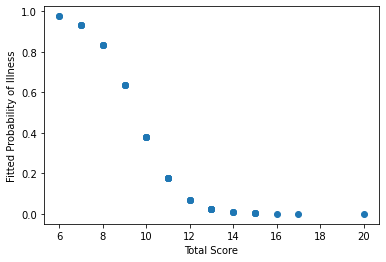

In [9]:
# Plot fitted probabilities of illness versus the total score:
def p(x):   # Calcuate the fitted probabilities
    e = result2.params["const"]+result2.params[0]*x
    return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p, np.sum(psych.iloc[:,1:6], axis=1))) 

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


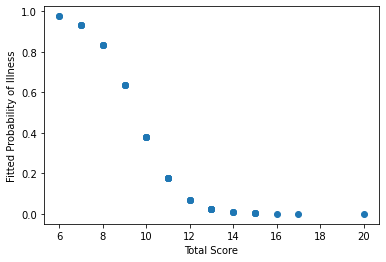

In [10]:
# Plot fitted probabilities of illness versus the total score:
fitprob = result2.predict(sm.add_constant(np.sum(psych.iloc[:,1:6], axis=1)))

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)
  
# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

In [11]:
a=psych.iloc[:,1:6].values.tolist()
a[0]

[2, 2, 2, 2, 2]

Now, when $p=1$ (using all $\beta$ coefficients) and plotting the probability against the answers for Question 1 only

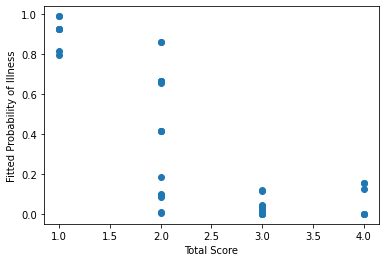

In [20]:
# Plot fitted probabilities of illness versus the total score:
def p2(x):   # Calcuate the fitted probabilities
  e = result1.params["const"] + np.sum(np.array([result1.params[i+1] * x[i] for i in range(5)]))
  return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p2, psych.iloc[:,1:6].values.tolist())) 

# plotting the points  
plt.scatter(psych.iloc[:,1], fitprob)

# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

What about for question 2

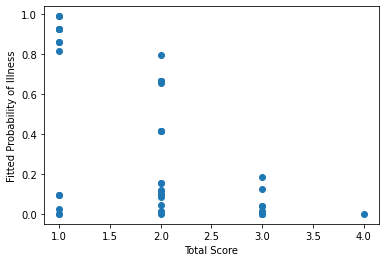

In [ ]:
# Plot fitted probabilities of illness versus the total score:
def p2(x):   # Calcuate the fitted probabilities
  e = result1.params["const"] + np.sum(np.array([result1.params[i+1] * x[i] for i in range(5)]))
  return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p2, psych.iloc[:,1:6].values.tolist())) 

# plotting the points  
plt.scatter(psych.iloc[:,2], fitprob)

# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

What about for the total score points vs the probability computed by the GLM?

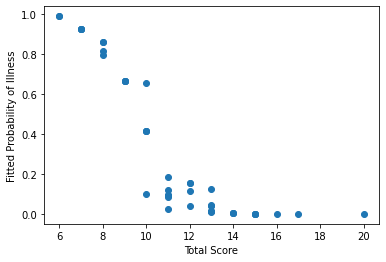

In [21]:
# Plot fitted probabilities of illness versus the total score:
def p2(x):   # Calcuate the fitted probabilities
  e = result1.params["const"] + np.sum(np.array([result1.params[i+1] * x[i] for i in range(5)]))
  return(math.exp(e)/(1+math.exp(e)))

fitprob = list(map(p2, psych.iloc[:,1:6].values.tolist())) 

# plotting the points  
plt.scatter(np.sum(psych.iloc[:,1:6], axis=1), fitprob)

# naming the x axis 
plt.xlabel('Total Score') 
# naming the y axis 
plt.ylabel('Fitted Probability of Illness') 

# function to show the plot 
plt.show() 

##Conclusion 
All plots shown here make sense since the trend indicates that the higher the score, the healthier the individual is. No matter if the probability of a single question score or the total score is considered, when plotting against the probability (computed with the GLM coefficients), the trend is the same (with a negative slope). In other words, lower scores indicates the invidual is likely to be ill. \\
Also note that when plotting the results when using the $\beta$'s for the 5 explanatory variables $x_i$, although the probability shows a negative slope trend, it is also scatter in the region from 10 to 14 total score. This behavior is smoothed when using a single $\beta$ by adding up the total score and compute the coefficients.  

Finally, summing binary (0/1) observations with the same x (replications) gives a grouped data binomial distribution \\

\begin{aligned}
  Y_i ~ binomial(n_i, \pi(x_i))
\end{aligned}

where $i$ now referes to the ith group (of the $n_i$ binary observations). Hence, whetever data are groupe or ungropued, fitting with maximum likelihood give the same results

\\

###Example 2: Snoring & Heart Disease Data

This is just a simple example where the snoring level (0 - 5) is tabulated against illness disease or no disease cases. Again, this analysis represents a binomial distribution case since there are only two posibilities. The idea is to create a GLM that predicts if an individual is prone to suffer a heart attack based on his/her snoring level 

In [22]:
data = np.array([(24, 1355, 0),(35, 603, 2),(21,192, 4), (30, 224, 5)])
snoreheart = pd.DataFrame(data, columns=['Disease',  'NoDisease',  'Snoring'])
snoreheart

,Disease,NoDisease,Snoring
0,24,1355,0
1,35,603,2
2,21,192,4
3,30,224,5


Note that `endog` is a 2d array for the binomial family `[Disease NoDisease]` and exog is an array-like (single value in this case) for the independent variables $x_i$

In [25]:
endog = snoreheart.iloc[:,:2] #y: Disease and NoDisease
exog = sm.add_constant(snoreheart.Snoring) # x: Snoring with the interception

snorefit = sm.GLM(endog, exog, family=sm.families.Binomial())
result3 = snorefit.fit()
print(result3.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     ['Disease', 'NoDisease']   No. Observations:                    4
Model:                                  GLM   Df Residuals:                        2
Model Family:                      Binomial   Df Model:                            1
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -11.531
Date:                      Sat, 18 Feb 2023   Deviance:                       2.8089
Time:                              18:57:39   Pearson chi2:                     2.87
No. Iterations:                           7                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Now, let's plot this results. Note how the GLM predicts the trend for any random value for the snoring level range analyzed. 

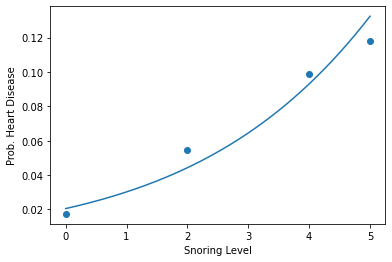

In [33]:
plt.scatter(snoreheart.Snoring, snoreheart.Disease/(snoreheart.Disease+snoreheart.NoDisease))
plt.xlabel('Snoring Level')
plt.ylabel('Prob. Heart Disease')
x = np.linspace(0, 5, 200)
plt.plot(x, result3.predict(sm.add_constant(x)))
plt.show()

##Conclusion
From this plot, it can be clearly observed that there is a strong positive correlations between the level of snoring and the probabily of a heart disease. Note how the GLM is able to capture the trend of the real data

\\

##Example 3: Horseshoe Crab Data

Recall that counts of independently-ocurring incidents (without any maximum) are often modeled using the Poisson distribution

In this example, we aim to analyze horseshoe crab data. In particular, we want to see how the width of female (cm) $x_i$ is related to $Y_i$, the number of males ("satellites") by female $i$ 

In [36]:
url_data_horse = 'https://raw.githubusercontent.com/dalexa10/Python_Data_Science/main/Statistical_Modeling/GLM/horseshoe.txt'
horseshoe = pd.read_csv(url_data_horse, sep=' ').iloc[:, :6]  # Last column dropped, it doesn't mean anything
horseshoe.shape
horseshoe.head(5)

,color,spine,width,satell,weight,y
0,3,3,28.3,8,3050,1
1,4,3,22.5,0,1550,0
2,2,1,26.0,9,2300,1
3,4,3,24.8,0,2100,0
4,4,3,26.0,4,2600,1


Let's create a simple plot to visualize the data first

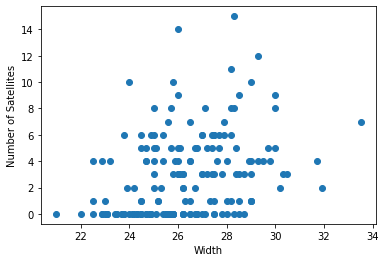

In [39]:
# plotting the points  
plt.scatter(horseshoe.width, horseshoe.satell)   
plt.xlabel('Width') 
plt.ylabel('Number of Satellites') 
plt.show() 

And now, let's create the GLM with a `Poison()` method in the `sm.families` 

In [38]:
endog = horseshoe.satell
exog = sm.add_constant(horseshoe.width)

crabfit = sm.GLM(endog, exog, family=sm.families.Poisson())
result4 = crabfit.fit()
print(result4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 satell   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Sat, 18 Feb 2023   Deviance:                       567.88
Time:                        19:29:13   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3048      0.542     -6.095      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Now, let's plot the predicted results with the GLM, together with the real data 

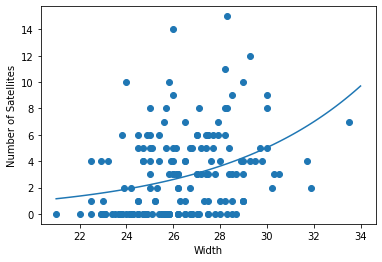

In [40]:
plt.scatter(horseshoe.width, horseshoe.satell) 
plt.xlabel('Width') 
plt.ylabel('Number of Satellites') 
x = np.linspace(21, 34, 100)
plt.plot(x, result4.predict(sm.add_constant(x)))
plt.show()

It captures the trend, doesn't it? Let's do an individual analysis instead. We know from the obtained GLM that:
&nbsp;

\begin{aligned}
  \hat{\mu}(x) \approx e^{-3.3048 + 0.164 x}
\end{aligned}
Hence, a 30 [cm] female should have about 

In [42]:
mu_30 = np.exp(-3.3048 + 0.164 * 30)
print('{:.2f} satellites'.format(mu_30))

5.03 satellites


##Conclusion
For each 1 [cm] increase in width, the mean number of satellites increases by a factor of

In [57]:
increase = np.exp(0.164)
percentaje = str(round(increase, 2))[2:4]

print('{:.2f}, i.e. a percentaje incresae of {} %'.format(increase, percentaje))


1.18, i.e. a percentaje incresae of 18 %


\\

##Example 4
$E(Y_i) = \mu_i$ is sometimes expected to be proportional to another observed variable $t_i > 0$ and hence:
\begin{aligned}
  \mu_i = \lambda_i t_i
\end{aligned}


For this example in specific, we have:

$Y_i$ = number of collision between trains & road vehicles (year $i$)

$x_i$ = year minus 1975

$t_i$ = total km of train travel (millons)

In [63]:
url_data_train = 'https://raw.githubusercontent.com/dalexa10/Python_Data_Science/main/Statistical_Modeling/GLM/traincollisions.txt'
tc = pd.read_csv(url_data_train, sep=' ') # Last column dropped, it doesn't mean anything
tc.shape
tc.head(5)

,Year,KM,Train,TrRd
0,2003,518,0,3
1,2002,516,1,3
2,2001,508,0,4
3,2000,503,1,3
4,1999,505,1,2


if 
\begin{aligned}
  ln(\lambda_i) = \alpha + \beta_1 x_{i1} + ... + \beta_p x_{ip}
\end{aligned}

then, 
\begin{aligned}
ln(\mu_i) = ln(\lambda_i) + ln(t_i)\\
ln(\mu_i) = \alpha + \beta_1 x_{i1} + ... + \beta_p x_{ip} + ln(t_i)
\end{aligned}

Note that $ln(t_i)$ has no coefficient, and it is called offset. This value is input when solving the GLM as shown below 


In [64]:
endog = tc.TrRd
exog = sm.add_constant(tc.Year-1975)

tcfit = sm.GLM(endog, exog, offset = np.log(tc.KM), family=sm.families.Poisson()) #offset = log(KM)
result5 = tcfit.fit()
print(result5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   TrRd   No. Observations:                   29
Model:                            GLM   Df Residuals:                       27
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -64.760
Date:                Sat, 18 Feb 2023   Deviance:                       37.853
Time:                        20:21:17   Pearson chi2:                     42.2
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2114      0.159    -26.500      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Now, let's plot these results

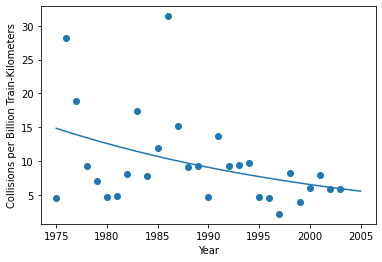

In [65]:
plt.scatter(tc.Year, 1000*tc.TrRd/tc.KM)
plt.ylabel('Collisions per Billion Train-Kilometers')
plt.xlabel('Year')
newyear = np.linspace(1975, 2005, 200)
KM = [1]*200
result5.predict(sm.add_constant(newyear-1975), offset = np.log(KM)) # predict when KM=1, log(1)=0
# result5.predict(sm.add_constant(newyear-1975), offset = [0]*200)
plt.plot(newyear, 1000 * result5.predict(sm.add_constant(newyear-1975), offset =  np.log(KM)))
plt.show()

##Conclusion
Again, the GLM is able to predict the trend, but the model do not show an adequate fitting to the data. However, something that can be preliminary concluded is that the rate of train collisions has decreased from around 15 collison per billion-train kilometers to around 10, i.e, around 30%